In [2]:
import numpy as np
import scipy
from scipy import signal as sig
from matplotlib import pyplot as plt
import os

%matplotlib inline
plt.rcParams["figure.figsize"] = (20,5)

In [3]:
PATH = "../data/archives/preliminary"

In [27]:
files = [file for file in os.listdir(PATH) if file.endswith(".nfc") if "vert900" not in file]
files.append("2.0-vert900-2.nfc")
files.sort()

In [28]:
signals = []

for file in files:
    signal = np.fromfile(os.path.join(PATH, file), dtype=scipy.complex64)
    name = file[:-4]
    signals.append((name, signal))

In [23]:
samp_rate = int(2e6)
nfft = 1024

# The number of samples per period is equal to the sample rate divided by the frequency
print(samp_rate / 13.56e6)
print(847500 / 13.56e6)  # 1/16 might be interesting

0.14749262536873156
0.0625


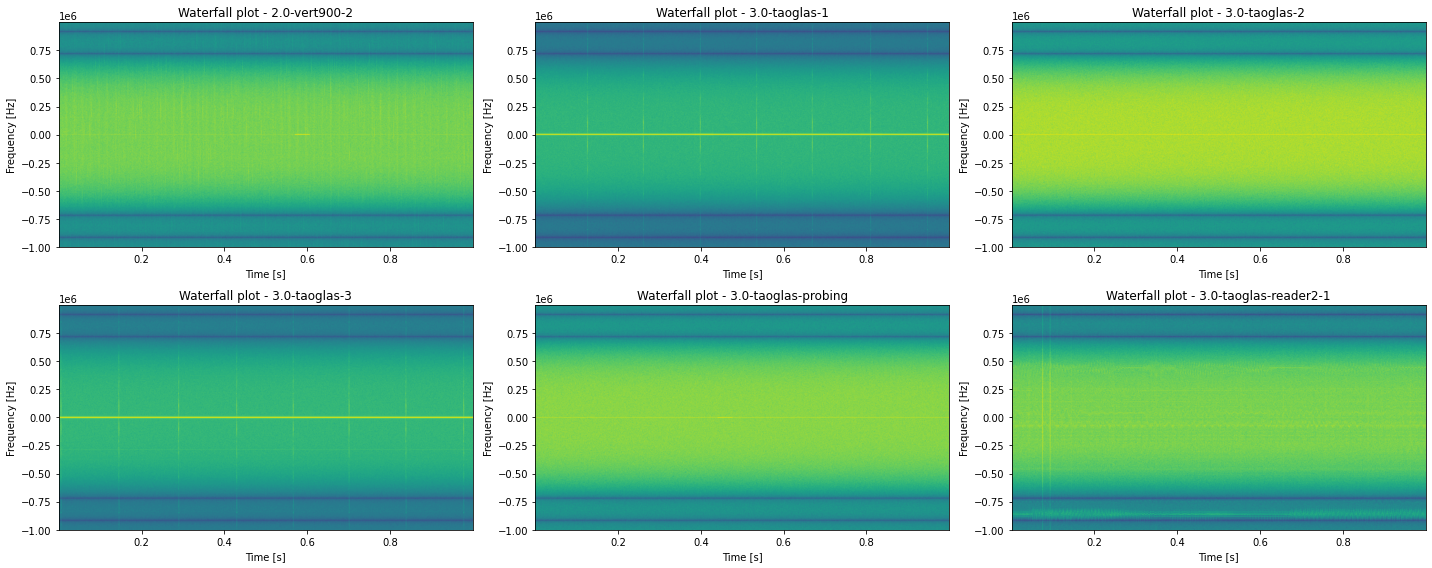

In [29]:
fig, axs = plt.subplots(2, 3, figsize=(20, 8))

for signal, ax in (t for t in zip(signals, axs.flat)):
    ax.specgram(signal[1][int(samp_rate):int(2*samp_rate)], NFFT=nfft, Fs=samp_rate)
    ax.set_title("Waterfall plot - {}".format(signal[0]))
    ax.set_xlabel("Time [s]")
    ax.set_ylabel("Frequency [Hz]")

plt.tight_layout()
plt.show()

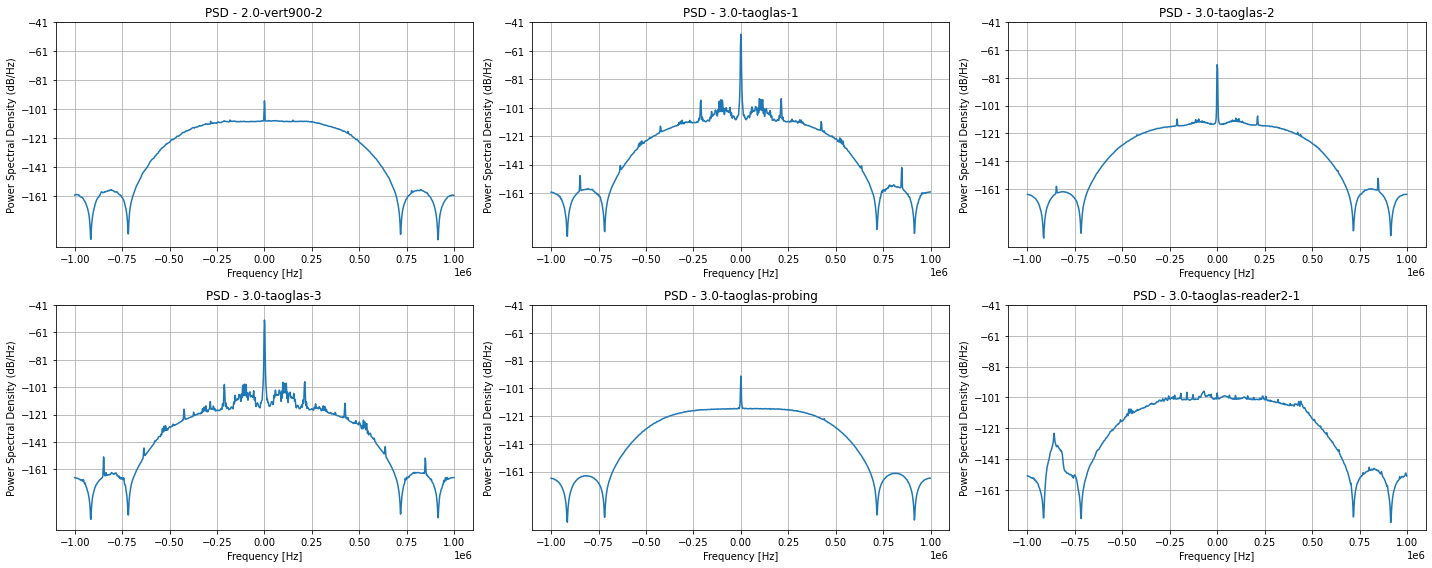

In [30]:
fig, axs = plt.subplots(2, 3, figsize=(20, 8))

for signal, ax in (t for t in zip(signals, axs.flat)):
    ax.psd(signal[1][int(samp_rate):int(4*samp_rate)], NFFT=nfft, Fs=samp_rate)
    ax.set_yticks(range(-161, -21, 20))
    ax.set_xlabel("Frequency [Hz]")
    ax.set_title("PSD - {}".format(signal[0]))

plt.tight_layout()
plt.show()